C:\Users\TmC
✅ Accuracy: 0.8212290502793296

📊 Confusion Matrix:
 [[91 14]
 [18 56]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



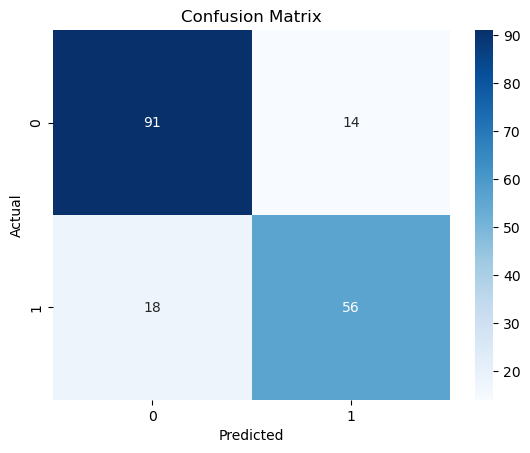

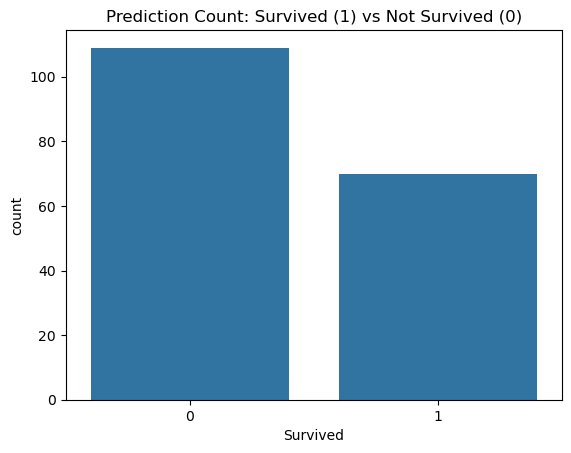

In [6]:
import os
print(os.getcwd())
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 2: Load Dataset
data = pd.read_csv(r"C:\Users\TmC\Downloads\archive\Titanic-Dataset.csv")
# Step 3: Data Cleaning
# Future-proof way to fill missing values
data.fillna({'Age': data['Age'].mean(), 'Embarked': data['Embarked'].mode()[0]}, inplace=True)
# Drop irrelevant columns
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
# Encode categorical columns
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
# Step 4: Train-Test Split
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Step 6: Predictions & Evaluation
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
# Step 7: Visualization
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Bar chart for predicted survival
pred_df = pd.DataFrame(y_pred, columns=['Survived'])
sns.countplot(x='Survived', data=pred_df)
plt.title('Prediction Count: Survived (1) vs Not Survived (0)')
plt.show()
